In [48]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Import csv

## Main import

In [49]:
with open('../data/ESP_PUBLIC.IDENTITE_ARBRE.csv', newline='', encoding='utf-8-sig') as csvfile:
    # use "," separator to generate column value as list element
    # cs.reader return a class object of "_csv.reader"
    dataTemp = csv.reader(csvfile, delimiter=',')
    
    # Use list() to convert the csv object into a list, of list, depending on how the object is built
    # Hard to understand how list(csv_object) behaves 
    data = list(dataTemp)

## Copy the dataset to advoid re-import

In [50]:
dataset = data

## Correct last row


In [51]:
def add_missing_value(dataset:list) -> list:
    datasetCopy = dataset
    
    if len(datasetCopy[len(datasetCopy)-1]) == 31:
    
        datasetCopy[len(datasetCopy)-1].insert(0, "MISSING")
    
    return datasetCopy
print(add_missing_value(dataset)[len(dataset)-1])

['MISSING', 'ESP14073', 'ESP14073', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP151', 'Arbre de voirie', 'ESP336', 'R M Gontard angle M Deprez', '2', 'AR14073', 'Prunus', 'serrulata', '', 'Arbre adulte', '', '', '1995', '', '', '', '', '', '', '', '', '', '', 'Grenoble Alpes Métropole', '{"type":"Point","coordinates":[5.72422659146747,45.1920566916671]}']


## Utils

In [52]:
def get_header(data:list) -> list:
    if len(data) > 0:
        return data[0]
    else:
        raise ValueError("The dataset sent is empty...")

In [53]:
def get_dict_colName_colNum(data:list) -> dict:
    dictTemp = {}
    
    for el in get_header(data):
        dictTemp[el] = get_header(data).index(el)
        
    return dictTemp
# print(get_dict_colName_colNum(dataset))

In [54]:
def is_in_header(colName:str, data:list) -> bool:
    return colName in get_header(data)
# print(is_in_header("GENRE_DESC", dataset))

In [55]:
def average(col:list) -> float:
    for el in col:
        if type(el) is not float:
            raise TypeError("The list sent doesn't have float or contains empty string")
    return sum(col)/len(col)

# -----------------------------------------------------------------------------------------------------------

# Iteration 1 : Main computation

# -----------------------------------------------------------------------------------------------------------

## Afficher deux premieres lignes

In [56]:
# Slice and extract the first two list ie the first two lignes
header = get_header(dataset)
lignes2 = dataset[0:2]

specDataset = {
    "rows" : len(dataset),
    "columns" : len(dataset[0])
}

## Afficher colonne n°2

In [57]:
# We see that to access the row is [i] after lignes2. 
# Then we have the list corresponding to the row i-1 (start from 0)
# In this list, we use [i] to acces the i element corresponding to the column
ligne1_col2 = lignes2[0][1]
ligne2_col2 = lignes2[1][1]

In [58]:
print(ligne1_col2 + " : " + ligne2_col2)

CODE : ESP29285


## Get 50 first & last

In [59]:
# Should be called when having a list coming from : get_col_values()
def extract_50(col:list) -> list:
    if len(col) > 100:
        return col[:50]+ ["------> more values"] + col[len(col)-50:]
    else:
        raise ValueError(f"List {col} has less than 100 elements")
# extract_50(colList)

## Infos année plantation data

In [60]:
print(get_header(dataset))

['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE', 'GeoJSON']


In [61]:
def get_col_value_from_name(colName:str, data:list) -> str:
    
    if is_in_header(colName, data):
        return get_dict_colName_colNum(data)[colName]
    
# print(get_col_value_from_name(colName="CODE_PARENT", data=dataset))

In [62]:
def get_col_values(colName:str, data:list) -> list:
    
    col = [el[get_col_value_from_name(colName, data)] for el in data]
    
    return col
# print(get_col_values("ANNEEDEPLANTATION", dataset))

### Trees column parsing utils

In [63]:
colToStudy = "ANNEEDEPLANTATION"

In [64]:
colList = get_col_values(colToStudy, dataset)
colYearTree = colList
print("there is --> " + str(len(colList)) + " <-- trees studied")

there is --> 31620 <-- trees studied


In [65]:
def count_empty_value(col:list) -> int:
    
    emptyList = [el for el in col if not el]
    
    return len(emptyList)

In [66]:
print("there is --> " + str(count_empty_value(colList)) + " <-- empty values in " + colToStudy )

there is --> 1438 <-- empty values in ANNEEDEPLANTATION


In [67]:
def remove_empty(col:list) -> list:
    return [el for el in col if el]

In [68]:
def get_min(col:list) -> int:
    
    colValues = remove_empty(col)
    
    # Slice to get rid off the header
    return float(min(colValues[1:]))

In [69]:
def get_max(col:list) -> int:
    
    colValues = remove_empty(col)
    
    # Slice to get rid off the header
    return float(max(colValues[1:]))

### Count trees for each year in dataset

In [70]:
def count_specific_value_in_col(value:str, col:list) -> int:
    
    valuesCorresponding = [el for el in col if str(el) == str(value)]  
    
    return len(valuesCorresponding)

In [71]:
valueToFind = "1994"
print(f"There was {count_specific_value_in_col(valueToFind, colList)} trees planted in {valueToFind}")

There was 252 trees planted in 1994


In [72]:
print(f"The oldest year of plantation is : {get_min(colList)}")
print(f"The last year of plantation is : {get_max(colList)}")

The oldest year of plantation is : 1900.0
The last year of plantation is : 2021.0


### Count trees for each year in dataset

In [73]:
# This method compute for each year the number of trees planted
# Then it compute the average taking into account only the trees where the year is known
def average_trees_planted(col:list) -> dict:
    cleanList = remove_empty(col[1:])
    removeDuplicate = set(cleanList)
    
    nbTreesPerYear = [float(count_specific_value_in_col(el,col)) for el in removeDuplicate]
    print(f"Nombre d'annees connues ou des arbres ont été planté : {len(removeDuplicate)}")
    return round(average(nbTreesPerYear),2)

In [74]:
print(f"La moyenne n°1 des arbres plantés est : {average_trees_planted(colList)}")

Nombre d'annees connues ou des arbres ont été planté : 65
La moyenne n°1 des arbres plantés est : 464.32


In [75]:
# This function compute the average taking into account
# The total number of trees in the dataset
# The max and min year known

def rought_average(col:list) -> float:
    # remove one on the global size due to header
    nbArbre = float(len(col[1:]))
    # add +1 to take into account the full 2021 year
    interval = float(get_max(col)-get_min(col)+1)
    
    print(f"Diviser total arbre : {nbArbre} par intervalle d'annee etudier {int(get_min(col))} - {int(get_max(col))}")
    
    return round(nbArbre/interval,2)

In [76]:
print(f"La moyenne n°2 des arbres plantés est : {rought_average(colList)}")

Diviser total arbre : 31619.0 par intervalle d'annee etudier 1900 - 2021
La moyenne n°2 des arbres plantés est : 259.17


### Make tuple (year : nb_arbre)

In [77]:
def make_tuple_year_nbArbre(col:list) -> list:
    cleanList = remove_empty(col[1:])
    removeDuplicate = set(cleanList) 
    
    return [(el, count_specific_value_in_col(el, col)) for el in removeDuplicate]

In [78]:
# Sort the list of tuples (year, value) by year
def sort_by_year(tupleList:list) -> list:
    return sorted(tupleList, key=lambda x:x[0], reverse=True)

In [95]:
treeTupleList = make_tuple_year_nbArbre(colList)
sortedTreeTupleList = sort_by_year(treeTupleList)
sortedTreeTupleList

[('2021', 3),
 ('2020', 102),
 ('2019', 88),
 ('2018', 775),
 ('2017', 622),
 ('2016', 516),
 ('2015', 1012),
 ('2014', 886),
 ('2013', 319),
 ('2012', 310),
 ('2011', 494),
 ('2010', 452),
 ('2009', 647),
 ('2008', 211),
 ('2007', 138),
 ('2006', 582),
 ('2005', 384),
 ('2004', 341),
 ('2003', 341),
 ('2002', 319),
 ('2001', 1488),
 ('2000', 427),
 ('1999', 564),
 ('1998', 205),
 ('1997', 231),
 ('1996', 363),
 ('1995', 738),
 ('1994', 252),
 ('1993', 135),
 ('1992', 221),
 ('1991', 140),
 ('1990', 248),
 ('1989', 299),
 ('1988', 235),
 ('1987', 701),
 ('1986', 221),
 ('1985', 870),
 ('1984', 647),
 ('1983', 295),
 ('1982', 359),
 ('1981', 600),
 ('1980', 1445),
 ('1979', 324),
 ('1978', 847),
 ('1977', 602),
 ('1976', 898),
 ('1975', 3631),
 ('1974', 287),
 ('1973', 33),
 ('1972', 318),
 ('1971', 67),
 ('1970', 1366),
 ('1969', 314),
 ('1968', 111),
 ('1967', 53),
 ('1966', 85),
 ('1965', 734),
 ('1964', 6),
 ('1960', 701),
 ('1959', 16),
 ('1955', 118),
 ('1950', 402),
 ('1944', 27)

In [80]:
#sortedTreeTupleList

### Etude des Maires

In [81]:
maire = [['Rivail', 1904,1908],['Viallet', 1908,1910],['Cornier', 1910,1919],['Mistral', 1919,1932],['Martin', 1932,1935],['Cocat', 1935,1944],['Lafleur', 1944,1945],['Martin2', 1945,1947],['Bally', 1947,1948],['Perinetti', 1948,1949],['Martin3', 1949,1959],['Michallon', 1959,1965],['Dubedout', 1965,1983],['Carignon', 1983,1995],['Destot', 1995,2014],['Piolle', 2014,2021]]
maireDict = {el[0]:[el[1],el[2]] for el in maire}

In [82]:
def number_of_tree_per_maire(maire:dict, tupleListArbre:list) -> int:
    
    dictTemp = {}
    
    for el in tupleListArbre:
        for maire in maireDict.keys():
            #print(f"Le maire {key} a reigné sur Grenoble de {maireDict[key]}")
            #print(type(maireDict[key][0]))
            #print(type(el[0]))
            #print(f"{maireDict[maire][0]} <= {int(el[0])} < {maireDict[maire][1]} ????")
            if maireDict[maire][0] <= int(el[0])<maireDict[maire][1]:
                #print(f"The Maire {maire} planted --> {el[1]} <-- trees in the year {el[0]} during is mandat of [{maireDict[maire][0]},{maireDict[maire][1]}]")        
                
                if maire in dictTemp:
                    dictTemp[maire] += el[1]
                else:
                    dictTemp[maire] = el[1]
                
    return dictTemp

In [83]:
maireTreeDict = number_of_tree_per_maire(maireDict, sortedTreeTupleList)

In [84]:
def get_max_maire_tree(dictMaire:dict) -> str:
    return max(dictMaire, key=dictMaire.get)

In [85]:
max_maire = get_max_maire_tree(maireTreeDict)
print(f"The Maire who planted the more trees is --> {max_maire} <-- with a number of --> {maireTreeDict[max_maire]} <--")

The Maire who planted the more trees is --> Dubedout <-- with a number of --> 12074 <--


## Etude botanique

In [86]:
colToStudy = "GENRE_BOTA"
colBota = get_col_values(colToStudy, dataset)

In [87]:
print("there is --> " + str(count_empty_value(colBota)) + " <-- empty values in " + colToStudy )

there is --> 933 <-- empty values in GENRE_BOTA


In [88]:
colBota = get_col_values(colToStudy, dataset)
#colList

In [89]:
valueToFind = ""
print(f"There was {count_specific_value_in_col(valueToFind, colBota)} trees of type : {valueToFind}")

There was 933 trees of type : 


In [90]:
def concat_year_type(colListArbre:list, colListYear:list) -> list:
    if not len(colListArbre) == len(colListYear):
        raise ValueError("The two colone studied are not the same length")
    else:
        listTemp = []
        for year, treeType in zip(colListArbre, colListYear):
            tupleTemp = (year, treeType)
            listTemp.append(tupleTemp)
        
        return listTemp

In [91]:
yearBotaList = concat_year_type(colYearTree, colBota)
sortedyearBotaList = sort_by_year(yearBotaList)
sortedyearBotaList

[('ANNEEDEPLANTATION', 'GENRE_BOTA'),
 ('2021', 'Thuja'),
 ('2021', 'Tilia'),
 ('2021', 'Thuja'),
 ('2020', 'Ulmus'),
 ('2020', 'Ulmus'),
 ('2020', 'Pyrus'),
 ('2020', 'Malus'),
 ('2020', 'Pyrus'),
 ('2020', 'Pyrus'),
 ('2020', 'Pyrus'),
 ('2020', 'Prunus'),
 ('2020', 'Prunus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Parrotia'),
 ('2020', 'Syringa'),
 ('2020', 'Syringa'),
 ('2020', 'Prunus'),
 ('2020', 'Malus'),
 ('2020', 'Prunus'),
 ('2020', 'Quercus'),
 ('2020', 'Malus'),
 ('2020', 'Malus'),
 ('2020', 'Pyrus'),
 ('2020', 'Pyrus'),
 ('2020', 'Pyrus'),
 ('2020', 'Prunus'),
 ('2020', 'Malus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Sophora'),
 ('2020', 'Sophora'),
 ('2020', 'Sophora'),
 ('2020', 'Sophora'),
 ('2020', 'Ulmus'),
 ('2020', 'Ulmus'),
 ('2020', 'Ulmus'),
 ('2020', 'Prunus'),
 ('2020', 'Prunus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus'),
 ('2020', 'Quercus

## Graphic representation

In [92]:
data = [sortedTreeTupleList, sortedyearBotaList]
print(f"size year|number : {len(sortedyearBotaList)} and size of year|type : {len(sortedyearBotaList)}")

years = [int(d[0]) for d in sortedTreeTupleList[1:]]
number = [d[1] for d in sortedTreeTupleList[1:]]
Type = [d[1] for d in sortedyearBotaList[1:]]

size year|number : 31620 and size of year|type : 31620


## Simple chart : years | Number

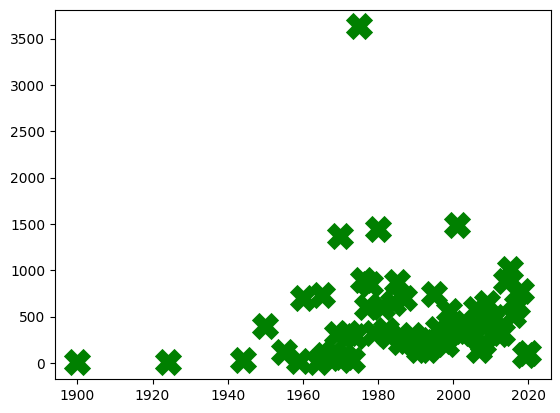

In [105]:
plt.scatter(years, number,  s=30, c="green", marker="x", facecolor="red", linewidth=20)

## Plot : 